In [2]:
%pylab inline
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

Populating the interactive namespace from numpy and matplotlib


In [3]:
# load train and test data
#mnist_train = np.loadtxt('../data/train.csv', delimiter=',', dtype=int, skiprows=1)
mnist_train = np.loadtxt('train_f.csv', delimiter=',', dtype=int, skiprows=1)
mnist_test = np.loadtxt('../data/test.csv', delimiter=',', dtype=int, skiprows=1)
#mnist_test = np.loadtxt('test_f.csv', delimiter=',', dtype=float64, skiprows=1)

In [4]:
#X_test[0,:]

In [5]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(mnist_train[:,1:], mnist_train[:,0])

In [6]:
# parameters
n_estimators = 500
n_jobs = 4

In [7]:
# check algorithm
clf = ExtraTreesClassifier(n_estimators=n_estimators, n_jobs=n_jobs)
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

In [8]:
# accuracy
matches = (predicted == expected)
print matches.sum() / float(len(matches))

# f1 score
from sklearn import metrics
print metrics.classification_report(expected, predicted)

# confusion matrix
print metrics.confusion_matrix(expected, predicted)

0.958848484848
             precision    recall  f1-score   support

          0       0.97      0.98      0.98     11459
          1       0.99      0.98      0.98     12840
          2       0.95      0.95      0.95     11385
          3       0.97      0.95      0.96     12010
          4       0.96      0.95      0.95     11302
          5       0.97      0.95      0.96     10452
          6       0.96      0.98      0.97     11288
          7       0.96      0.95      0.95     12276
          8       0.96      0.94      0.95     11135
          9       0.92      0.95      0.93     11353

avg / total       0.96      0.96      0.96    115500

[[11266     1     7     4    13    11    65     7    56    29]
 [    1 12606    72    52    18     4    14    34    20    19]
 [   39    25 10861    31   104     9    26   163    97    30]
 [   15    19   122 11441    20    87    17   116   114    59]
 [   37     9    35     0 10699    16    94    38    30   344]
 [   54    14    19   114    37

In [9]:
# use the model to predict the labels of the test data
predicted_proba = clf.predict_proba(X_test)
max_prob = predicted_proba.max(axis=1)
s = sorted(range(len(max_prob)), key=lambda k: max_prob[k])

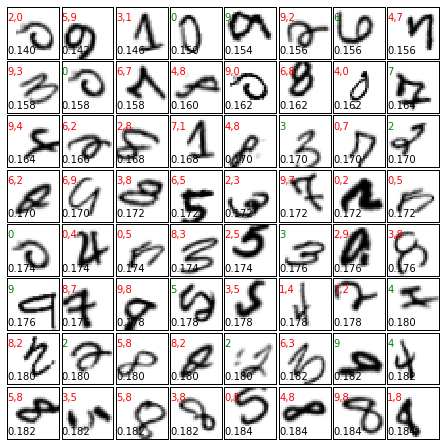

In [10]:
# copied from examples 
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[s[i],0:784].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    if predicted[s[i]] == expected[s[i]]:
        ax.text(0, 7, str(int(predicted[s[i]])), color='green')
        ax.text(0, 25, "%1.3f" % max(predicted_proba[s[i],:]))
    else:
        ax.text(0, 7, str(int(predicted[s[i]])) + "," + str(int(expected[s[i]])), color='red')
        ax.text(0, 25, "%1.3f" % max(predicted_proba[s[i],:]))

In [11]:
# train on all data
clf.fit(mnist_train[:,1:], mnist_train[:,0])

# use the model to predict the labels of the test data
predicted = clf.predict(mnist_test)

In [12]:
# write to file
with open("predicted_f2.txt", 'w') as f:
    f.write('ImageId,Label\n')
    for i in range(len(predicted)):
        f.write(str(i + 1) + ',' + str(int(predicted[i])) + '\n')